In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('owid-covid-data.csv')


In [7]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [10]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum()

,0
iso_code,0
continent,26525
location,0
date,0
total_cases,17631
...,...
population,0
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality,416024


In [15]:
#filter data for three countries to limit the scope of analysis
countries=['Kenya', 'United States', 'India']

df=df[df['location'].isin(countries)]

#conversion of date to datetime
df.loc[:, 'date'] = pd.to_datetime(df['date'])

#dropping rows with missing values for total_cases and total-deaths
df = df.dropna(subset=['total_cases', 'total_deaths'])

#interpolation of other numerical values
df[['new_cases', 'new_deaths']] = df[['new_cases', 'new_deaths']].interpolate(method='linear')


#Step 2: Data Cleaning#
The dataset was cleaned to prepare it for accurate and meaningful analysis. The following steps were taken:

*Country Selection:*
The dataset was filtered to include only three countries of interest: Kenya, United States, and India. These countries were chosen to allow comparison between a developing nation and two large, high-population countries with different pandemic responses.

*Date Format Conversion:*
The date column was converted from string format to a proper datetime format using pandas.to_datetime(). This enables easier time-based operations and plotting.

*Handling Missing Critical Values:*
Rows with missing values in critical columns such as total_cases and total_deaths were dropped to ensure the reliability of subsequent analysis.

*Interpolating Daily Metrics:*
For smoother visualization and analysis, missing values in new_cases and new_deaths were filled using linear interpolation. This assumes gradual change between days and preserves time series continuity.

In [18]:
# df.shape
# df.head()

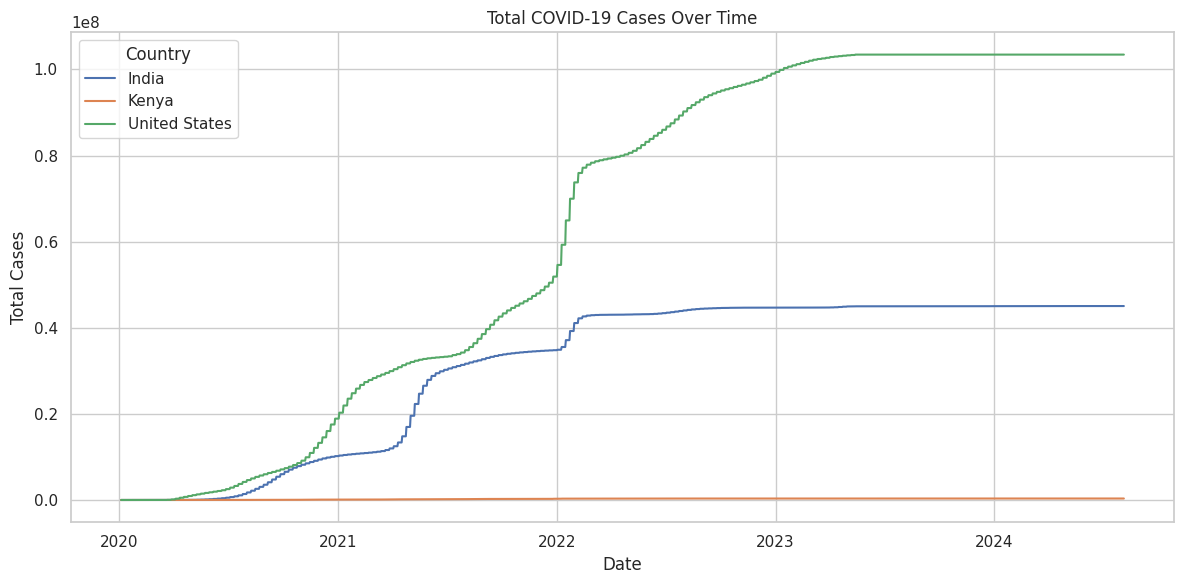

In [19]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_cases', hue='location')
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

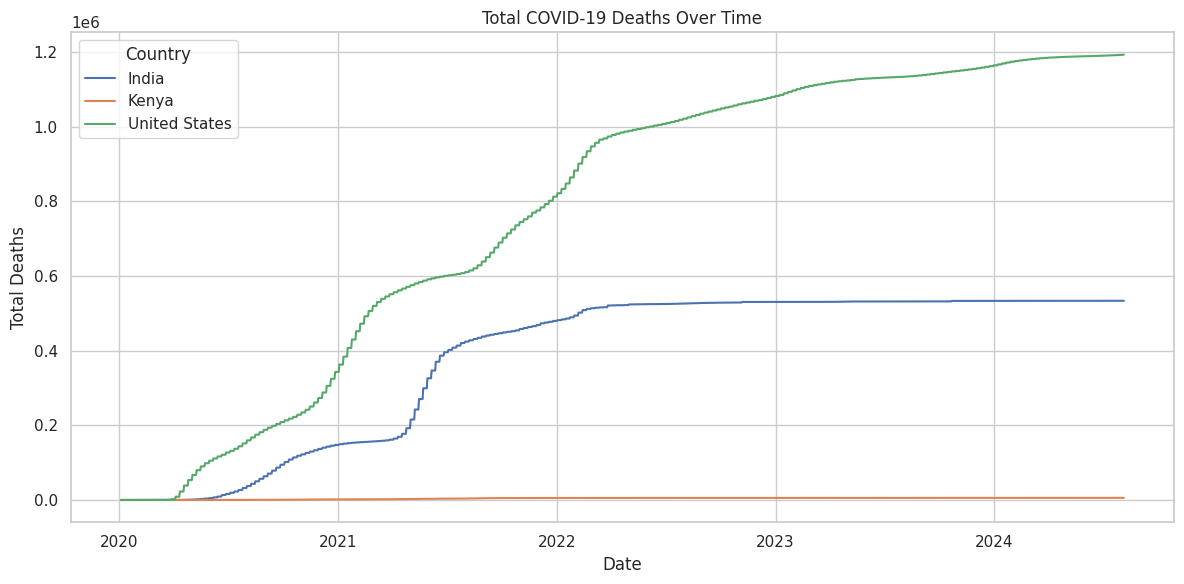

In [21]:
#Total deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_deaths', hue='location')
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

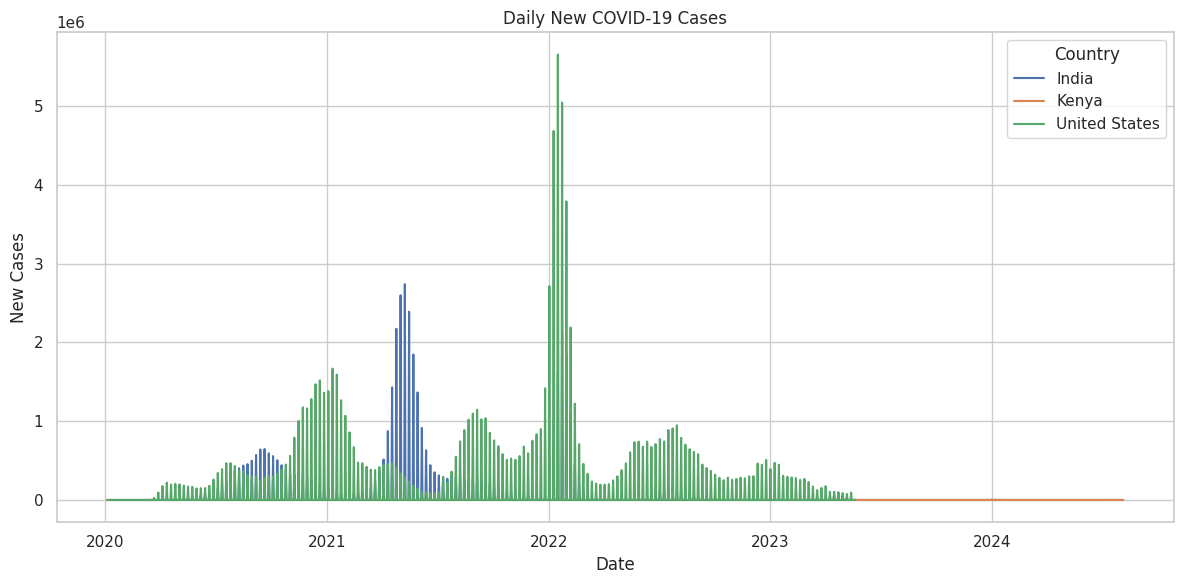

In [22]:
# Plot: Daily New Cases Comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

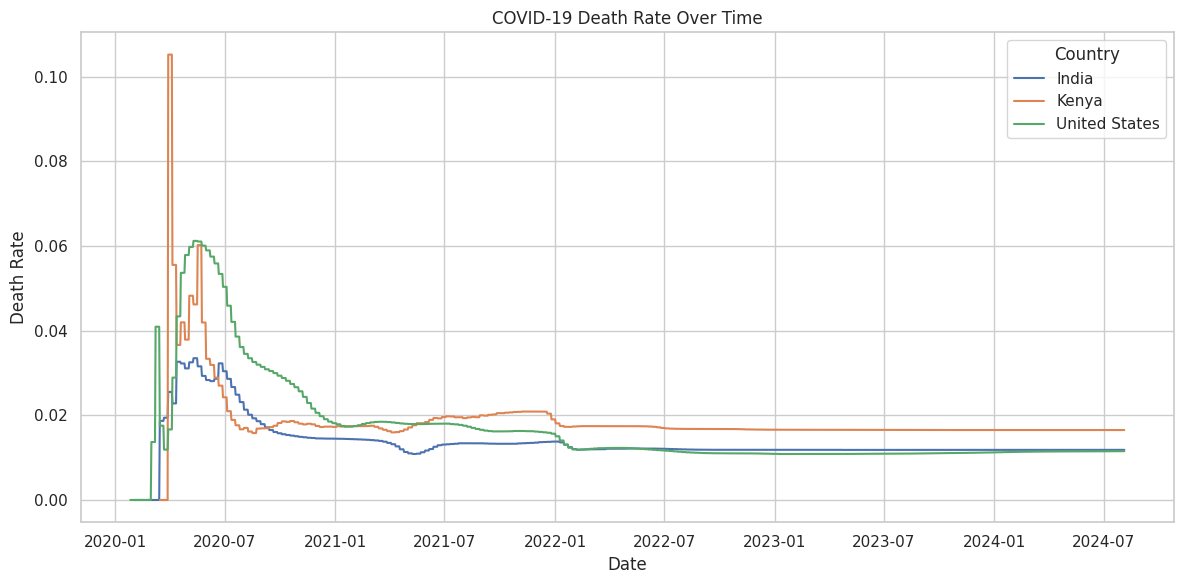

In [23]:
# Add Death Rate column
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Plot: Death Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='death_rate', hue='location')
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

#Step 3: Exploratory Data Analysis (EDA)#
The goal of this step is to uncover trends in COVID-19 cases and mortality across selected countries.

*Total Cases Over Time:*
The line chart illustrates the cumulative growth of COVID-19 cases. The United States shows a significantly steeper increase compared to India and Kenya, reflecting both its larger population and testing/reporting capacity.

*Total Deaths Over Time:*
A similar pattern emerges in total deaths. The United States leads with the highest death toll, followed by India, while Kenya remains comparatively lower — potentially due to demographic differences, testing capacity, or underreporting.

*Daily New Cases:*
Peaks in India and the United States align with known pandemic waves (e.g., Delta and Omicron). Kenya shows smaller but notable surges.

*Death Rate Trends:*
The death rate (total deaths / total cases) gives insight into severity and healthcare system effectiveness. It fluctuates early in the pandemic due to limited testing, but stabilizes over time. Kenya occasionally shows higher death rates, possibly due to late detection or healthcare limitations.